<a href="https://colab.research.google.com/github/RC11-SkillsClass2022-23/KexinGao_Augustine/blob/main/NN_MST_cropped_pngs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Installing

In [1]:
import tensorflow as tf
import PIL
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Dropout, Dense, Softmax)
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import networkx as nx
from sklearn.neighbors import NearestNeighbors
from IPython.display import Image as iImage
from IPython.display import display

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Call for nearest neighbor

In [3]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

17225924/17225924 [==============================] - 0s 0us/step


In [4]:
def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

In [5]:
masks = os.listdir('/content/drive/MyDrive/for_som_2')
masks.sort(key = lambda x : int(x.split('.')[0]))

In [6]:
def processImage(imagePath, model):
    im = load_image(imagePath)
    f = model.predict(im)[0]
    return f

features = []
def masks_list(masks,folder):
  for m in masks:
    path = os.path.join(folder, m)
    f = processImage(path, model)
    features.append(f)

In [7]:
masks = masks
folder = '/content/drive/MyDrive/for_som_2'
masks_list(masks,folder)

1/1 [==============================] - 0s 64ms/step


In [8]:
features

[array([0.39957598, 0.01866905, 0.54483485, ..., 0.        , 0.        ,
        0.7871944 ], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.        , 0.06796952, 1.8979368 , ..., 0.        , 0.08832349,
        0.01239223], dtype=float32),
 array([0.30999857, 0.        , 0.01265911, ..., 0.27417472, 0.03028843,
        0.05659595], dtype=float32),
 array([0.        , 0.12855579, 1.6656486 , ..., 1.7109311 , 0.58464134,
        0.08691265], dtype=float32),
 array([0.        , 0.334758  , 0.869747  , ..., 1.5998644 , 0.2568523 ,
        0.02166328], dtype=float32),
 array([0.18979637, 0.        , 0.0531525 , ..., 0.343808  , 0.11396778,
        0.03061226], dtype=float32),
 array([0.84359074, 0.        , 3.0639873 , ..., 0.7933265 , 0.5946951 ,
        1.1904477 ], dtype=float32),
 array([0.        , 0.55649626, 0.07624108, ..., 0.13321356, 0.34118342,
        0.38639185], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0.00

In [9]:
nbrs = NearestNeighbors(n_neighbors = 3, algorithm='auto').fit(features)
distances, indices = nbrs.kneighbors(features)
indices

array([[  0,  82,  11],
       [  1,  20,   9],
       [  2,  27,  26],
       [  3, 138,  64],
       [  4,   5,  28],
       [  5,   4,  28],
       [  6, 110,  15],
       [  7,  18,  21],
       [  8,  25,  41],
       [  9,  20,   1],
       [ 10,  76, 112],
       [ 11,  17,  22],
       [ 12, 110,  15],
       [ 13,  80,  78],
       [ 14,  25,  41],
       [ 15, 110,  12],
       [ 16,  87,  18],
       [ 17,  11,  70],
       [ 18,  21,   7],
       [ 19,   7,  87],
       [ 20,   1,   9],
       [ 21,  18,   7],
       [ 22,  17,  70],
       [ 23,  25,  14],
       [ 24,   2,  26],
       [ 25,   9,  20],
       [ 26,   2,  24],
       [ 27,  33,   2],
       [ 28, 111,  20],
       [ 29,  49,  71],
       [ 30,  37,  82],
       [ 31, 139,  39],
       [ 32,  63,  64],
       [ 33,  27,   2],
       [ 34,  67,  46],
       [ 35,  40, 103],
       [ 36, 130,  68],
       [ 37,  30,  82],
       [ 38, 130, 145],
       [ 39,  62,  43],
       [ 40,  35, 138],
       [ 41,  14

In [10]:
def showNearestNeighbours(index, indices, files, path):
  for i in indices[index]:
    f = files[i]
    print(f)
    display(iImage(filename = os.path.join(path, f)))

2_42.png


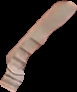

2_24.png


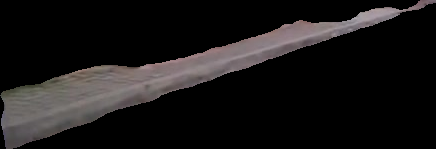

2_29.png


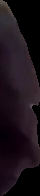

In [11]:
showNearestNeighbours(100, indices, masks, '/content/drive/MyDrive/for_som_2')

In [12]:
distances

array([[4.76837158e-07, 1.95750727e+01, 2.26443112e+01],
       [0.00000000e+00, 1.51433186e+00, 2.64763357e+00],
       [8.25906185e-07, 1.35015348e+01, 1.37662745e+01],
       [5.84003864e-07, 1.61077135e+01, 1.67857785e+01],
       [4.76837158e-07, 8.67213541e+00, 1.87827635e+01],
       [0.00000000e+00, 8.67213541e+00, 1.62544230e+01],
       [9.53674316e-07, 2.51844029e+01, 2.59950087e+01],
       [0.00000000e+00, 1.83361930e+01, 2.06717451e+01],
       [0.00000000e+00, 1.34704425e+01, 1.40610866e+01],
       [0.00000000e+00, 2.23513173e+00, 2.64763357e+00],
       [6.74349576e-07, 1.73572451e+01, 2.13242678e+01],
       [0.00000000e+00, 2.59796792e+00, 3.70030794e+00],
       [6.74349576e-07, 2.37560064e+01, 2.40350404e+01],
       [9.53674316e-07, 2.03038676e+01, 2.25977903e+01],
       [6.74349576e-07, 1.33672377e+01, 1.38390427e+01],
       [0.00000000e+00, 1.16638630e+01, 2.40350404e+01],
       [4.76837158e-07, 2.16189676e+01, 2.20250913e+01],
       [0.00000000e+00, 2.59796

##Generate the graph

In [13]:
G = nx.Graph()

In [14]:
for m in masks:
  image = os.path.join('/content/drive/MyDrive/for_som_2/', m)
  G.add_node(m,image=image)

In [15]:
def createEdges(indices, files, distances):
  weightedEdges = []
  for i in range(len(indices)):
    index = indices[i]
    dist = distances[i][1:]
    
    node = files[index[0]]
    
    edges = []
    for e in index[1:]:
      edges.append(files[e])
    
    for i in range(len(edges)):
      weightedEdges.append((node, edges[i], dist[i]))
  
  return weightedEdges

In [16]:
edges = createEdges(indices, masks, distances)
edges

[('1_1.png', '2_24.png', 19.575072711989794),
 ('1_1.png', '2_6.png', 22.64431124019825),
 ('1_5.png', '3_6.png', 1.5143318558678098),
 ('1_5.png', '2_4.png', 2.6476335683815186),
 ('1_6.png', '1_13.png', 13.501534833902912),
 ('1_6.png', '1_12.png', 13.766274548381135),
 ('1_7.png', '3_39.png', 16.107713526711162),
 ('1_7.png', '1_50.png', 16.785778493091723),
 ('1_8.png', '1_9.png', 8.672135412756624),
 ('1_8.png', '1_14.png', 18.78276352964459),
 ('1_9.png', '1_8.png', 8.672135412756624),
 ('1_9.png', '1_14.png', 16.254423038377798),
 ('2_1.png', '3_11.png', 25.184402919081187),
 ('2_1.png', '3_1.png', 25.99500872313039),
 ('2_2.png', '3_4.png', 18.336192977289222),
 ('2_2.png', '3_7.png', 20.671745086515433),
 ('2_3.png', '1_11.png', 13.470442450944912),
 ('2_3.png', '1_27.png', 14.06108662602191),
 ('2_4.png', '3_6.png', 2.235131729135474),
 ('2_4.png', '1_5.png', 2.6476335683815186),
 ('2_5.png', '2_18.png', 17.35724506650834),
 ('2_5.png', '3_13.png', 21.32426776590355),
 ('2_6.

In [17]:
G.add_weighted_edges_from(edges)

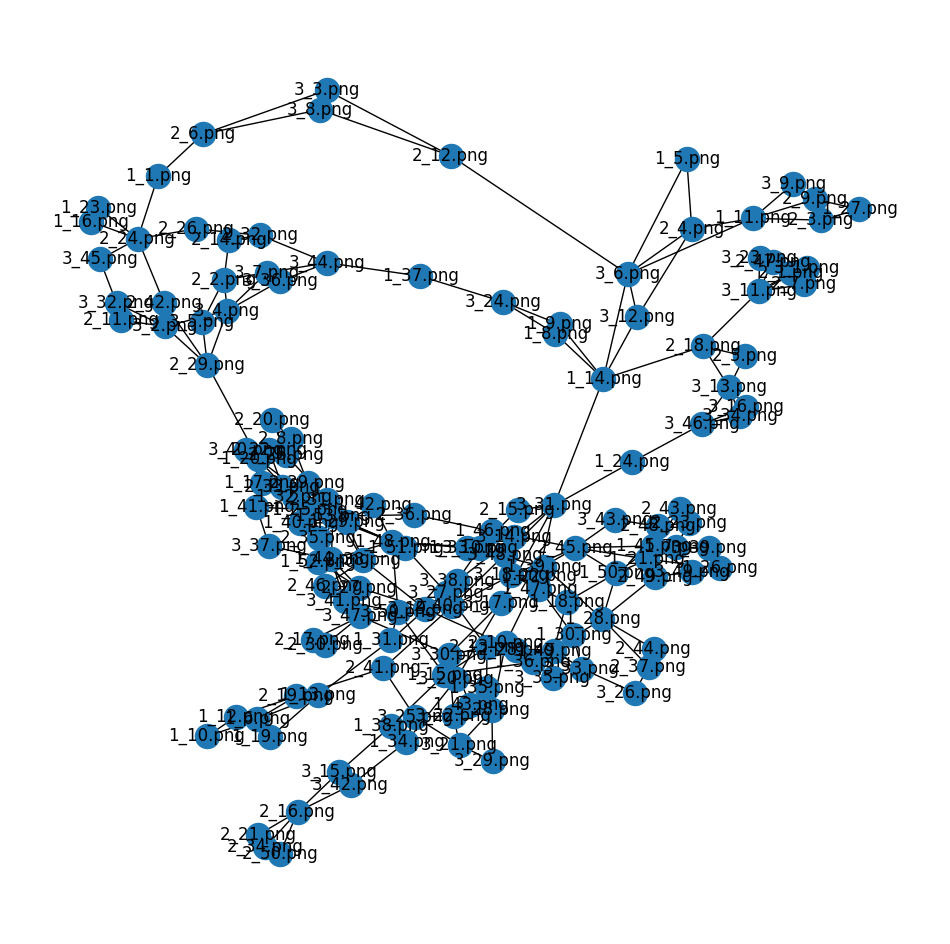

In [18]:
fig, ax = plt.subplots(figsize = (12,12))
nx.draw(G, with_labels=True)

In [19]:
T = nx.minimum_spanning_tree(G)

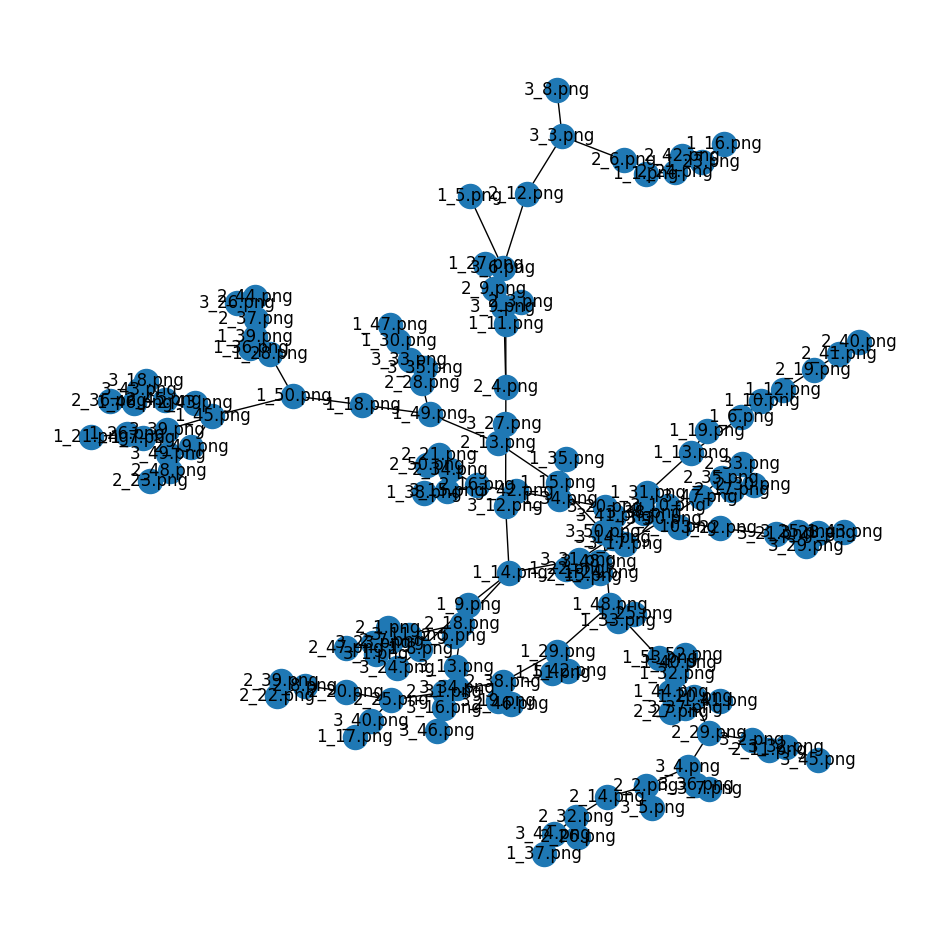

In [20]:
fig, ax = plt.subplots(figsize = (12,12))
nx.draw(T, with_labels=True)